<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Tutorial_de_Py4Hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de _Py4Hw_

_Py4Hw_ es una librería de _Python_ que nos permite describir y simular circuitos sin la necesidad de construirlos (es decir, es una suerte de Lenguaje de Descripción de Hardware, o _HDL_ por sus siglas en inglés).

En este _Notebook_, aprenderemos cómo se usa esta librería, de cara a poder resolver ejercicios y hacer nuestros inventos.
Seguidlo en orden, de arriba abajo, entendiendo y ejecutando cada parte.

## Cargar _Py4Hw_

Para poder usar Py4Hw debemos realizar dos acciones:

1.   Instalar el módulo (empleando _pip_)
2.   Importar la librería

In [1]:
# TEST BUILD

!pip install nbwavedrom
!git clone https://github.com/ThePituLegend/py4hw
%cd /content/py4hw
from py4hw import *

  Created wheel for nbwavedrom: filename=nbwavedrom-0.2.0-cp37-none-any.whl size=38561 sha256=3737e26cd43dad972c67c2927846a471b172b0e9685143114cdb103b1619f479
  Stored in directory: /root/.cache/pip/wheels/b7/21/65/212364648dee2775b0e26c584a61ed1107a345bf8ea8c16ebe
Successfully built nbwavedrom
Cloning into 'py4hw'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (386/386), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 386 (delta 233), reused 250 (delta 128), pack-reused 0
Receiving objects: 100% (386/386), 92.00 KiB | 4.18 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/py4hw


In [2]:
"""
!pip install py4hw # Instalamos el módulo
from py4hw import * # Importamos todo el contenido del módulo al Notebook
"""

'\n!pip install py4hw # Instalamos el módulo\nfrom py4hw import * # Importamos todo el contenido del módulo al Notebook\n'

## Bloque base: Jerarquía

Py4Hw funciona de forma jerárquica. Esto significa que podemos crear un nuevo bloque, que contenga bloques, que a su vez contenga más bloques, y así sucesivamente.

Toda esta estructura debe tener un punto de entrada (lo que se conoce como _Top Level_). Este elemento se define mediante la clase _HWSystem_. Cualquier otro componente que añadamos al circuito, va a depender de éste.

In [3]:
sys = HWSystem()

## Cables

Para interconectar los bloques de un circuito, necesitamos cables.
Estos se crean con la clase _Wire_.

Los cables en Py4Hw se definen por 3 características:

1.   Su _parent_
2.   Un nombre
3.   Un ancho en bits

**IMPORTANTE**: Estamos trabajando con clases (sus constructores) y funciones, por tanto el orden es relevante. 
Si no nos acordamos, o bien _Notebook_ no nos ayuda a recordar dicho orden, en Python se pueden dar los parámetros por nombre

```
x = Clase(parametro2=a, parametro1=b)
```

In [4]:
cable1 = Wire(sys, "Cable de Ejemplo 1", 3) # Depende de sys (el HWSystem creado anteriormente) y es de 3 bits
cable2 = Wire(sys, "Cable de Ejemplo 2")    # Si no especificamos el ancho, es de 1 bit
cable3 = sys.wire("Cable de ejemplo 3", 5)  # De esta forma, el parent está implícito

## Bloques elementales

Py4Hw nos proporciona un conjunto de bloques funcionales y recursos típicos para montar nuestros circuitos. Cada uno de estos bloques es una clase que implementa la funcionalidad, y que podemos instanciar a voluntad.

A continuación tenéis una lista con los más comunes (aunque existen unos pocos más):

*   **Puertas lógicas**
>*   Or
>*   And
>*   Nand
>*   Not
>*   Xor

*   **Recursos de cálculo**
>*   Constant (Valor constante)
>*   Add (Sumador)
>*   Sub (Restador)
>*   Mul (Multiplicador)

*   **Recursos de comparación**
>*   Equal (Comparación de igualdad)
>*   Sign (Comprobación de signo)
>*   Comparator (Circuito comparador completo: mayor que, igual o menor que)

*   **Bloques de control** 
>*   Mux2 (Multiplexor de 2 entradas)
>*   Mux (Multiplexor de _n_ entradas)
>*   Decoder (Decodificador de _n_ salidas)

*   **Elementos de memoria** 
>*   Reg (Regístro síncrono de _n_ bits)
>*   **NOTA**: En _Py4Hw_ el reloj es implícito, por lo tanto este no se indica.

Cada uno de estos bloques requiere:

*   A qué bloque pertenece en la jerarquía (es decir, su _parent_)
*   Un nombre
*   Las entradas y salidas del bloque que se necesiten. 

Por lo general, y salvo que se indique lo contrario, todos los bloques admiten entradas con cantidades de bit arbitrarias.

A lo largo de este tutorial y de diferentes ejemplos, veremos estos bloques y algunos más.

A continuación, veamos un ejemplo de cómo usar uno de estos bloques.

Vamos a construir un ejemplo muy sencillo, en el que interconectamos un par de constantes a un bloque sumador.

In [5]:
# Instanciamos dos cables de entrada, de 3 bits.
n1 = sys.wire("Número 1", 3)
n2 = sys.wire("Número 2", 3)

# Instanciamos dos constantes para sumar. Escogemos 5 y 4.
# Podremos ver que no es necesario guardar el bloque en ninguna variable, 
#   puesto que los cables ya relacionarán los bloques entre sí.
# Constant(parent, name, value, wire)
Constant(sys, "Número 1", 5, n1)
Constant(sys, "Número 2", 4, n2)

# Instanciamos un tercer cable, de salida, de 4 bits.
# Como se espera que el resultado sea 9, con 3 bits no nos bastaría.
res = sys.wire("Resultado", 4)

# Instanciamos el módulo sumador, y le conectamos los cables pertinentes.
# Add(parent, name, a, b, r) => r = a + b
Add(sys, "Sumador", n1, n2, res)

El problema es que, si bien el circuito es estructuralmente correcto (de lo contrario obtendríamos errores de código), no sabemos si nos da el resultado esperado.

Para eso necesitamos realizar una simulación.

## Simulación

_Py4Hw_ no solo nos permite describir circuitos: también nos permite simularlos.

Para ello, primero debemos obtener un simulador del circuito que estemos creando.

In [6]:
sim = sys.getSimulator() # Obtenemos el simulador asociado al circuito actual.

Por otro lado, cuando simulemos un circuito no siempre querremos ver todo lo que está pasando, sino que nos centraremos en determinadas señales.

Para ello, debemos indicarle a _Py4Hw_ qué cables queremos monitorizar. Disponemos de dos bloques que realizan esta labor:

*   Scope (Nos muestra el valor del cable en formato texto cada ciclo de reloj)
*   Waveform (Nos genera un cronograma con el valor del cable)

Ambos bloques admiten listas de cables, así no necesitamos un bloque por señal.

Los _Waveform_, a diferencia de los _Scope_, se deben almacenar en una variable.

In [7]:
cableMon1 = sys.wire("Cable a monitorizar1") # Cable de ejemplo
cableMon2 = sys.wire("Cable a monitorizar2") # Cable de ejemplo

Scope(sys, "Cable1", cableMon1)              # Scope que monitoriza cableMon
wave = Waveform(sys, "Cable2", cableMon2)    # Cronograma que monitoriza cableMon

wave2 = Waveform(sys, "Combo de cables", 
                 [cableMon1, cableMon2])     # Waveform con múltiples señales                   

Una vez hemos seleccionado las señales a monitorizar, podemos empezar a simular el circuito indicando al simulador que queremos que avance en el tiempo (en ciclos de reloj).

```
sim.clk(x) # x = cantidad de cíclos a avanzar, normalmente 1
```


Con esto, iremos simulando el circuito a lo largo del tiempo.

Los _Scope_ funcionarán automáticamente, pero los _Waveform_ no se dibujarán hasta que se lo hagamos explícitamente.

```
draw_waveform(wave.get_waveform())
```



Con todos los componentes claros, podemos retomar el ejemplo anterior y simularlo. En este ejemplo veremos que no vale la pena usar _Waveform_, puesto que el circuito es combinacional. 
Sin embargo, cuando veamos ejemplos secuenciales nos será muy útil para visualizar la información.

El código al completo quedaría así:

In [8]:
# Creamos el HWSystem que servirá de punto inicial del circuito.
sys = HWSystem()

# Instanciamos dos cables de entrada, de 3 bits.
n1 = sys.wire("Número 1", 3)
n2 = sys.wire("Número 2", 3)

# Instanciamos dos constantes para sumar. Escogemos 5 y 4.
# Podremos ver que no es necesario guardar el bloque en ninguna variable, 
#   puesto que los cables ya relacionarán los bloques entre sí.
# Constant(parent, name, value, wire)
Constant(sys, "Número 1", 5, n1)
Constant(sys, "Número 2", 4, n2)

# Instanciamos un tercer cable, de salida, de 4 bits.
# Como se espera que el resultado sea 9, con 3 bits no nos bastaría.
res = sys.wire("Resultado", 4)

# Instanciamos el módulo sumador, y le conectamos los cables pertinentes.
# Add(parent, name, a, b, r) => r = a + b
Add(sys, "Sumador", n1, n2, res)

# Instanciamos un Scope y un Waveform para ver la señal res
Scope(sys, "Resultado <Scope>", res)
wf = Waveform(sys, "Resultado <Wave>", res)

# Obtenemos el simulador del circuito.
sim = sys.getSimulator()

# Simulamos 1 ciclo
#  (el circuito es combinacional, las entradas no varían en el tiempo, no tiene sentido simular más)
sim.clk(1)

# Dibujamos el waveform
draw_waveform(wf.get_waveform())

Scope [Resultado <Scope>]:
Resultado=9
--------------------------


## Creación de bloques

Hasta ahora hemos visto cómo podemos montar un circuito a partir de bloques ya existentes.

¿Pero cómo creamos nuestros propios bloques?
En _Py4Hw_ un bloque es una clase que implementa el funcionamiento del bloque. Así que para hacer nuestros propios bloques, solo debemos crear una nueva clase.

De cara a definir el funcionamiento del bloque, podemos hacerlo de dos formas:

*   **Estructuralmente:** La clase instancia otros bloques y los interconecta.
>    Todo se implementa en el constructor.
*   **Conductual:** Se define el comportamiento del circuito mediante código.
>*   *Combinacional:* Implementan el método _propagate()_.
>*   *Secuencial:* Implementan el método _clock()_.

A continuación, vamos a ver un ejemplo de bloque que implementaremos usando ambos metodos.

Se trata de un circuito que nos permite, dados dos numeros, escoger entre sumarlos o multiplicarlos dada una tercera señal de control (0 = Sumar, 1 = Multiplicar).


>*Apunte rápido sobre las clases en Python*
*   La herencia de clases se marca entre parentesis.
*   Todos los métodos de una clase, incluso aquellos sin parámetros, reciben siempre el parámetro _self_. Este solo se escribe cuando se crea la clase, no cuando se instancia. Es parecido al _this_ de C/C++.
*   Una variable de la forma self.x dentro de un método, define un atributo de la clase. Las variables sin _self_, son tratadas como "temporales".

Versión Conductual:

In [9]:
class SumMulCond(Logic): # Todos los bloques derivan de la clase Logic
  """
  Sumador / Multiplicador Conductual
  Si sel = 0 => out = a + b
  Si sel = 1 => out = a * b
  """

  # Todos los bloques tienen que implementar, como mínimo el constructor.
  # El constructor necesita, como mínimo, un parent (de tipo Logic) y un name (de tipo str)
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, sel: Wire, out: Wire):
    super().__init__(parent, name) # Llamamos al constructor de la clase base

    # Marcamos los cables pertinentes como entradas y les damos un nombre
    self.a = self.addIn("Número 1", a)
    self.b = self.addIn("Número 2", b)
    self.sel = self.addIn("Selección", sel)

    # Marcamos el cable pertinente como salida y le damos un nombre
    self.out = self.addOut("Resultado", out)
  
  # Puesto que se trata de un circuito combinacional (puesto que no necesitamos elementos de memoria),
  #  implementamos propagate()
  def propagate(self):
    if self.sel.get() == 0: # Con get() obtenemos el valor de la señal
      res = self.a.get() + self.b.get()
    else:
      res = self.a.get() * self.b.get()
    
    self.out.put(res) # Con put() actualizamos el valor de la señal

Versión estructural:

>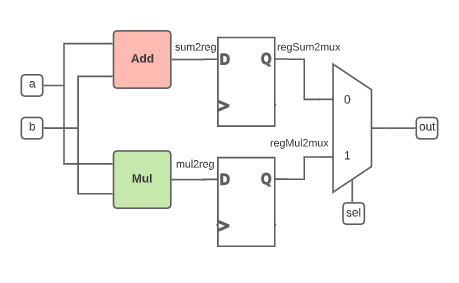

In [13]:
class SumMulEstr(Logic): # Todos los bloques derivan de la clase Logic
  """
  Sumador / Multiplicador Estructural
  Si sel = 0 => out = a + b
  Si sel = 1 => out = a * b
  """

  # En una implementación estructural, todo se realiza en el constructor
  # El constructor necesita, como mínimo, un parent (de tipo Logic) y un name (de tipo str)
  def __init__(self, parent: Logic, name: str, a: Wire, b: Wire, sel: Wire, out: Wire):
    super().__init__(parent, name) # Llamamos al constructor de la clase base

    # Marcamos los cables pertinentes como entradas y les damos un nombre
    self.a = self.addIn("Número 1", a)
    self.b = self.addIn("Número 2", b)
    self.sel = self.addIn("Selección", sel)

    # Marcamos el cable pertinente como salida y le damos un nombre
    self.out = self.addOut("Resultado", out)

    # Instanciamos los cables intermedios que necesitemos
    sum2reg = self.wire("Sum->Reg", 32) # Por simplicidad, asumiremos 32 bits.
    mul2reg = self.wire("Mul->Reg", 32)
    regSum2mux = self.wire("reg(sum)->mux(0)", 32)
    regMul2mux = self.wire("reg(mul)->mux(1)", 32)
    one = self.wire("1") # Cable de 1 bit para el enable de los registros

    # Instanciamos los bloques que componen el circuito

    # Constant(parent, name, value, wire) => wire = value
    Constant(self, "1", 1, one) # El cable siempre está a 1

    # Add(parent, name, a, b, out) => out = a + b
    Add(self, "Sumador", self.a, self.b, sum2reg)
    
    # Mul(parent, name, a, b, out) => out = a * b
    Mul(self, "Multiplicador", self.a, self.b, mul2reg)

    # Reg(parent, name, d, enable, q). Por simplicidad, enable siempre activo.
    Reg(self, "Reg(sum)", sum2reg, one, regSum2mux)
    Reg(self, "Reg(mul)", mul2reg, one, regMul2mux)

    # Mux2(parent, name, sel, 0, 1, out). Mux 2-a-1
    Mux2(self, "Multiplexor", self.sel, regSum2mux, regMul2mux, self.out)


Ambos bloques deberían dar el mismo resultado.
La única forma de saberlo, es montando una simulación.

In [14]:
# Creamos el HWSystem que servirá de punto inicial del circuito.
sys = HWSystem()

# Instanciamos dos cables de entrada, de 3 bits.
n1 = sys.wire("Número 1", 3)
n2 = sys.wire("Número 2", 3)

# Instanciamos un tercer cable, de selección, de 1 bit
sel = sys.wire("Selección")

# Instanciamos dos constantes para sumar/multiplicar. Escogemos 5 y 4.
# Constant(parent, name, value, wire)
Constant(sys, "Número 1", 5, n1)
Constant(sys, "Número 2", 4, n2)

# Instanciamos un cuarto cable, de salida, de 5 bits (uno para cada versión).
# Como se espera que el resultado sea 20 como máximo, con 4 bits no nos bastaría.
res1 = sys.wire("Resultado (Cond.)", 5)
res2 = sys.wire("Resultado (Estr.)", 5)

# Instanciamos las dos versiones del módulo.
# SumMulX(parent, name, a, b, sel, out) => out = a + b // a * b (según sel)
SumMulCond(sys, "SumMul (Cond.)", n1, n2, sel, res1)
SumMulEstr(sys, "SumMul (Estr.)", n1, n2, sel, res2)

# Instanciamos un Scope y un Waveform para ver las señales resx
Scope(sys, "Resultado", [res1, res2])
wf = Waveform(sys, "Resultado", [res1, res2])

# Obtenemos el simulador del circuito.
sim = sys.getSimulator()

# Simulamos 1 ciclo con sel = 0
sel.put(0)
sim.clk(1)

# Simulamos 1 ciclo con sel = 1
sel.put(1)
sim.clk(1)

# Dibujamos el waveform
draw_waveform(wf.get_waveform())

Scope [Resultado]:
Resultado (Cond.)=9
Resultado (Estr.)=9
------------------
Scope [Resultado]:
Resultado (Cond.)=20
Resultado (Estr.)=20
------------------


Podemos ver que ambos bloques funcionan correctamente y son equivalentes.